In [25]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import matplotlib.cm

In [22]:
# name of the file containing the data in .csv format
data_files = ['data/final_model_results/model_params_and_results_1_runs_beowawe_AHe_episodic500yr_5-11-2018.csv',
              'data/final_model_results/model_params_and_results_1_runs_beowawe_AHe_episodic_1000yrs_30-10-2018.csv',
              'data/final_model_results/model_params_and_results_1_runs_beowawe_AHe_epi1000yr_6500rec_6-11-2018.csv',
              'data/final_model_results/model_params_and_results_1_runs_beowawe_AHe_epi1000yr_4000rec_5-11-2018.csv',
              'data/final_model_results/model_params_and_results_1_runs_beowawe_AHe_episodic1000yr_2000yr_rec_4-11-2018.csv',
              'data/final_model_results/model_params_and_results_1_runs_beowawe_AHe_episodic2000yr_31-10-2018.csv',
              'data/final_model_results/model_params_and_results_1_runs_beowawe_AHe_cont_31-10-2018.csv']

model_names = ['500 / 9500 years',
               '1000 / 9000 years',
               '1000 / 6500 years',
               '1000 / 4000 years',
               '1000 / 2000 years',
               '2000 / 8000 years',
               'continuous']

markers = ['s', 'v', 'o', '^', '*', '+', 'd']

colors = np.array([[27,158,119],
                   [10, 10, 10],
                   [217,95,2],
                   [117,112,179],
                   [231,41,138],
                   [102,166,30],
                   [230,171,2]]) / 255.0

lss = [':', '--', '--', '--', '--', '-.', '-']

# name of the index column:
index_column = 'row'
x_cols = ['runtime_yr', 'runtime_yr', 'runtime_yr', 'runtime_yr']
y_cols = ['mean_error_AHe_samples_corrected_profile2',
         'mean_abs_error_AHe_samples_corrected_profile2',
         'lowest_age_surface',
         'width_partial_reset']

x_labels = ['Duration (a)', 'Duration (a)', 'Duration (a)', 'Duration (a)']
degree_symbol = chr(176)
y_labels = ['Mean error AHe ages (Ma)', 'MAE AHe ages (Ma)', 'Lowest AHe age (Ma)', 'Width partial reset zone (m)']

figsize = (8, 6)
color = 'gray'
size = 50

nrow = 2
ncol = 2

read the datafile:

In [15]:
# read the datafile using pandas:
dfs = [pd.read_csv(data_file) for data_file in data_files]
#dfs = [df.set_index(index_column) for df in dfs]


In [16]:
n_data = len(dfs)
for i in range(n_data):
    dfs[i]['width_partial_reset'] = dfs[i]['x_max_partial_reset_surface'] - dfs[i]['x_min_partial_reset_surface']  

#dfs = [df.dropna(subset=[x_col, y_col]) for df in dfs]

parameters for 2d scatter plot

saving figure as fig/model_comparison_AHe.pdf


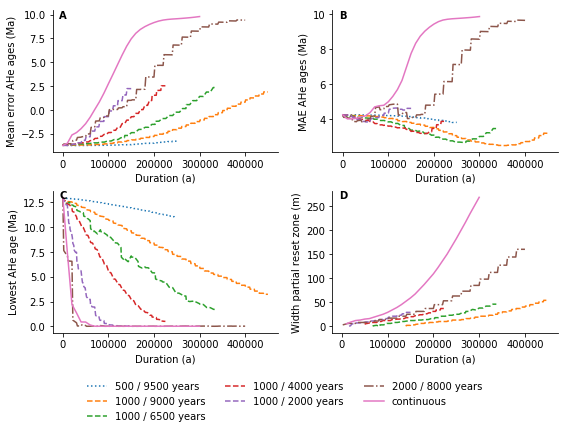

In [28]:
fig, axs = pl.subplots(nrow, ncol, figsize=figsize)

axs = axs.ravel()

for ax, x_col, y_col, x_label, y_label in zip(axs, x_cols, y_cols, x_labels, y_labels):
    for df, marker, color, ls in zip(dfs, markers, colors, lss):
        ax.plot(df[x_col], df[y_col], ls=ls)#, marker=marker)

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

fig.legend(model_names, loc='lower center', ncol=3,  
           frameon=False)
    #bbox_to_anchor = (0,-0.1,1,1),
#          bbox_transform = fig.transFigure,

fig.tight_layout()

fig.subplots_adjust(bottom=0.22)

for i, ax in enumerate(axs):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(0.03, 1.0, string.ascii_uppercase[i], 
               weight='bold', transform=ax.transAxes, 
               ha='left', va='top', fontsize='medium')

fn = 'fig/model_comparison_AHe.pdf'
print('saving figure as %s' % fn)
fig.savefig(fn)